##Ejercitacion 3.
###Leo Mansini LU 318/19. 
Laboratorio de datos. 1° cuatrimestre 2021.


Importo librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Cargo datos fashion_mnist, separo en test/train set, le doy un formato de imagen (reshape), cambio el tipo de dato y lo normalizo

In [ ]:
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 10000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


Hago PCA en todas las componentes

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # todas las componentes
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Grafico varianza explicada por cada componente, y luego varianza acumulada por las componentes. Veo que las dos componentes mas principales explican el $\sim 48$% de toda la varianza. 

In [ ]:
exVar = pca.explained_variance_ratio_

Text(0.5, 0, 'Cantidad de componentes principales')

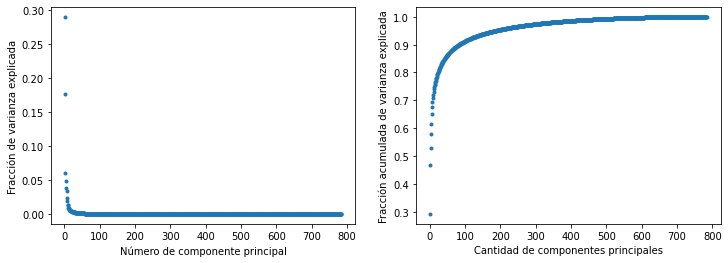

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
                       #784
ax[0].plot(range(1, len(exVar) + 1), exVar, '.')
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(exVar)

ax[1].plot(range(1, len(exVar) + 1), varianza_acumulada, '.')
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

Para las primeras 5 componentes principales (en orden de cuanta varianza explican), ploteo a cuales píxeles pertenecen. Por ejemplo, la componente 1 parece ser más dependiente de los píxeles que cubriría una remera, mientras que la componente 2 o 4 pueden llegar a detectar un pantalón.

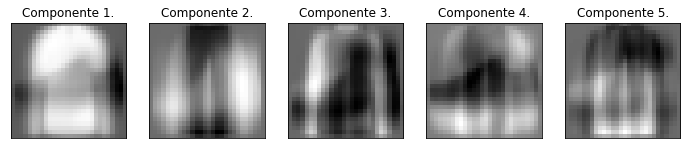

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (12, 14))

for i in range(5):
    ax[i].imshow(pca.components_[i].reshape(28, 28), interpolation='none', cmap="gray")
    ax[i].set_title(f"Componente {i+1}.")
    ax[i].set_xticks([]) # le saco los ticks en el eje X
    ax[i].set_yticks([]) # le saco los ticks en el eje Y

Elijo 3 imágenes y las reconstruyo usando solo 2, 10, 25, 50 y 100 componentes, comparando cada caso. Se ve que con pocas componentes se puede recontruír mucho de la imagen, aunque si se aumentan las componentes la imagen siempre se parece más a la original.

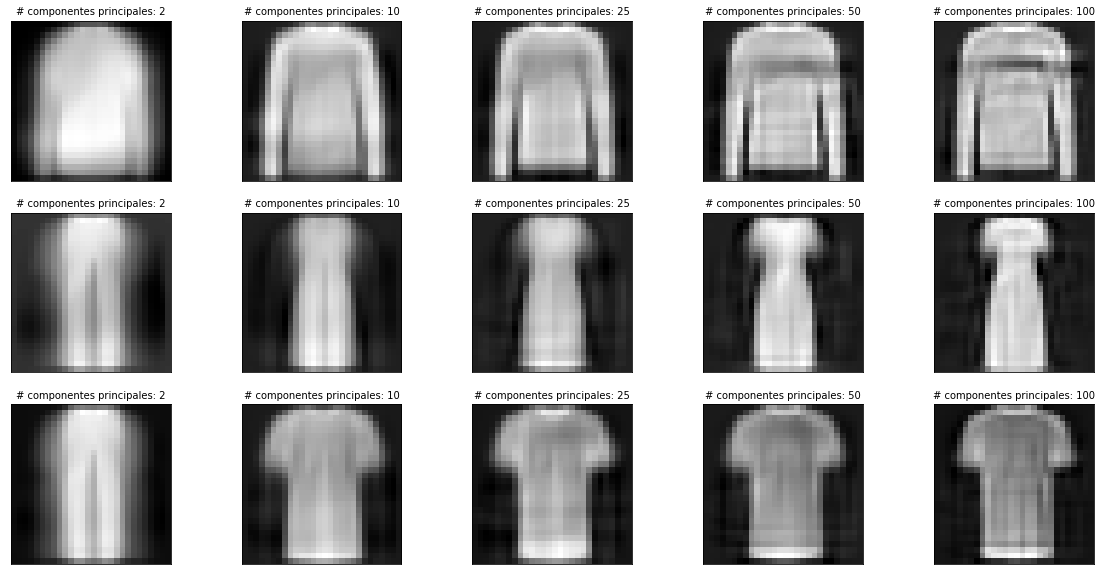

In [ ]:
fig, ax = plt.subplots(3, 5, figsize = (20, 10)) # seteo el tamano de la figura

componentes = [2, 10, 25, 50, 100]
imagenes = [5, 50, 789]

# Reconstruyo varias imagenes
for i in range(len(imagenes)):
    # Recorremos distinta cantidad de componentes
    for j in range(len(componentes)):

      # Creación del modelo de PCA con p componentes
      pca = PCA(n_components = componentes[j])

      # Ajuste y transformación de los datos
      pca.fit(X_train)
      X_pca = pca.transform(X_train)

      # Reconstrucción de la cara desde el espacio reducido!!!
      X_r = pca.inverse_transform(X_pca)

      # Ploteo de la cara reconstruida con el mismo código de antes
      ax[i, j].imshow(X_r[imagenes[i], :].reshape(28, 28), interpolation='none', cmap="gray") # plotea la imagen en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
      
      ax[i, j].set_title("# componentes principales: {}".format(componentes[j]), fontsize = 10)
      
      ax[i, j].set_xticks([]) # le saco los ticks en el eje X
      ax[i, j].set_yticks([]) # le saco los ticks en el eje Y


Extraigo las dos componentes más principales, y grafico una en función de la otra para cada imagen.

In [ ]:
pca = PCA(n_components=2) # Solo las dos componentes mas principales

pca.fit(X_train)

X_pca = pca.fit_transform(X_train)

Text(0, 0.5, 'Segunda componente principal')

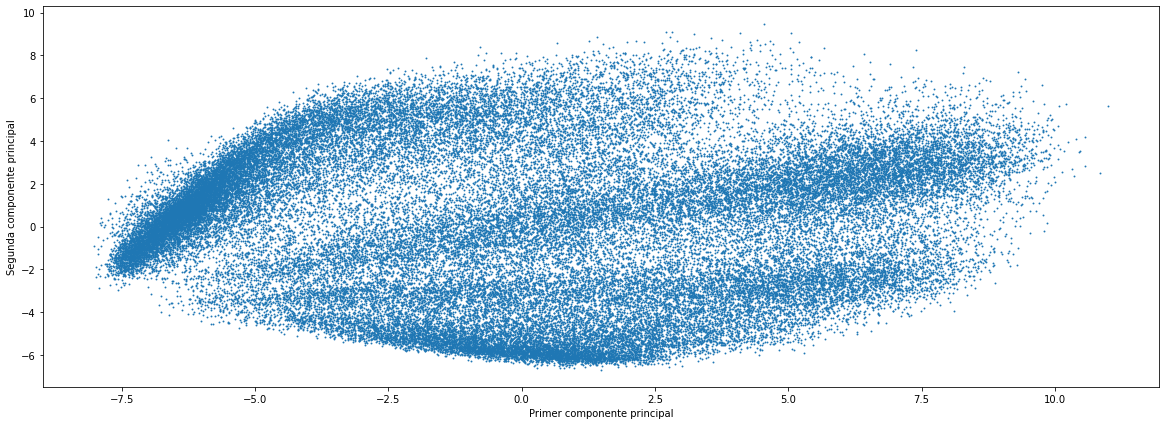

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], s = 0.8)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

Usando como datos las dos componentes principales de todas las imágenes, uso KMeans para extraer 2 clusters.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) # 2 clusters en los datos de las dos componentes principales
kmeans.fit(X_pca)

kmeans.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

Uso algunos ejemplos para ver que tipo de prenda fue a cada cluster. Parece que los calzados y bolsos terminaron en el cluster 0.

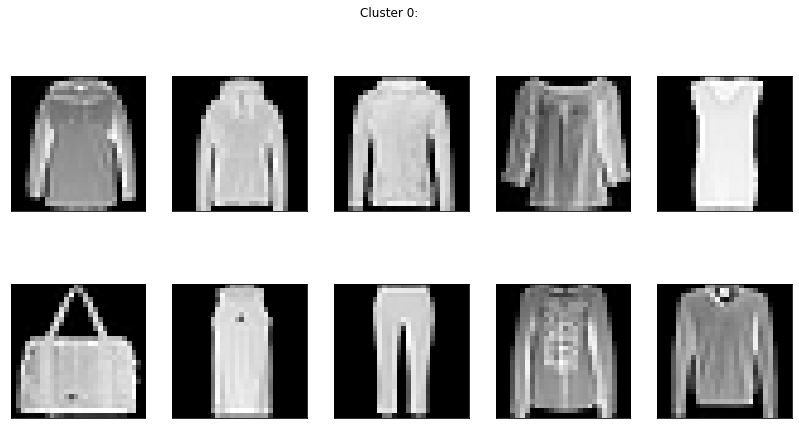

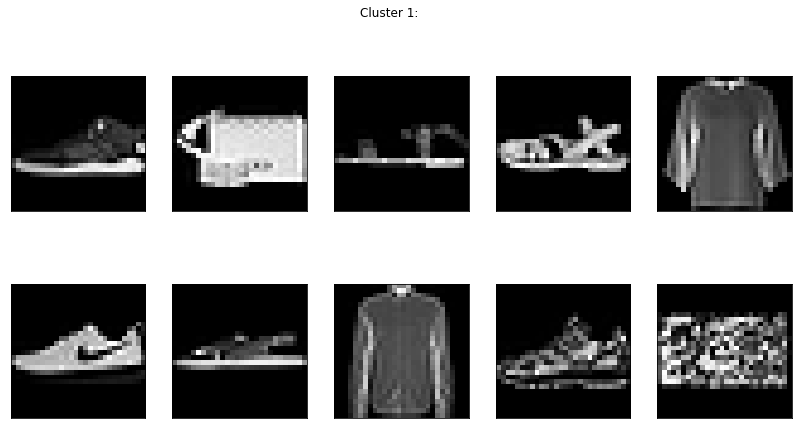

In [ ]:
cluster0 = np.nonzero(kmeans.labels_==0)[0] # indices de imagenes en el cluster 0
cluster1 = np.nonzero(kmeans.labels_)[0] # indices de imagenes en el cluster 1

indicesImagenes0 = np.random.choice(cluster0, size=10, replace=False)
indicesImagenes1 = np.random.choice(cluster1, size=10, replace=False)

fig, ax = plt.subplots(2, 5, figsize = (14, 7)) # seteo el tamano de la figura
fig.suptitle("Cluster 0:")

for i in range(2):
    for j in range(5):
      # Ploteo de las imagenes y anoto a que cluster pertenecen
      ax[i, j].imshow(X_train[indicesImagenes0[j+5*i], :].reshape(28, 28), interpolation='none', cmap="gray") 
      ax[i, j].set_xticks([]) # le saco los ticks en el eje X
      ax[i, j].set_yticks([]) # le saco los ticks en el eje Y


fig, ax = plt.subplots(2, 5, figsize = (14, 7)) # seteo el tamano de la figura
fig.suptitle("Cluster 1:")

for i in range(2):
    for j in range(5):
      # Ploteo de las imagenes y anoto a que cluster pertenecen
      ax[i, j].imshow(X_train[indicesImagenes1[j+5*i], :].reshape(28, 28), interpolation='none', cmap="gray") 
      ax[i, j].set_xticks([]) # le saco los ticks en el eje X
      ax[i, j].set_yticks([]) # le saco los ticks en el eje Y


Gráficos comparando el tipo de prenda y a que cluster fueron. Como dos componentes principales explican la mitad de la varianza, no parece que la clusterización haya segmentado el espacio reducido de 2D correctamente.
Luego veremos si el KMeans es bueno prediciendo tipo de prenda.

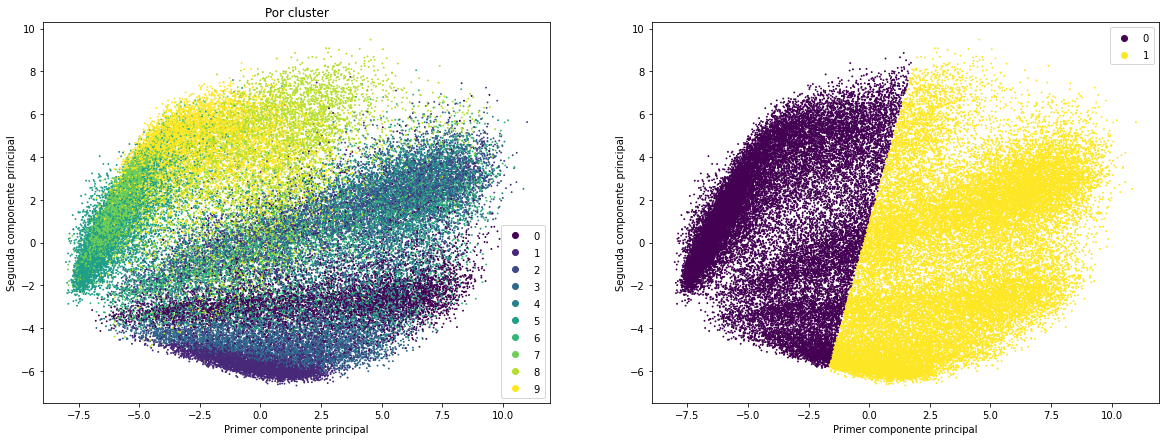

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos, el color es el tipo de prenda
scatter1 = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s = 0.8)
ax[0].legend(*scatter1.legend_elements()) # Leyenda para cada color

ax[0].set_xlabel('Primer componente principal')
ax[0].set_ylabel('Segunda componente principal')
ax[0].set_title("Por etiqueta (tipo de prenda)")

# Scatter pero aquí el color es el cluster dado por KMeans
scatter2 = ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s = 0.8)
ax[1].legend(*scatter2.legend_elements()) # Leyenda para cada color

ax[1].set_xlabel('Primer componente principal')
ax[1].set_ylabel('Segunda componente principal')
ax[0].set_title("Por cluster")
plt.show()

Creo un clasificados KNN utilizando k = 5. Lo entreno con las imagenes y usando como etiquetas los cluster de KMeans.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, kmeans.labels_)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Creo un set de entrenamiento asumiendo que los clusters sean así:

* Cluster 0: Remeras, Pantalones, Pullovers, Vestidos, Sobretodos, Camisas.
* Cluster 1: Sandalias, Zapatillas, Bolsos, Botas.

Y tomando 1000 imágenes aleatorias predigo a que cluster deberían ir con KNN.



In [ ]:
y_test_cluster = np.logical_or(y_test<5, y_test==6)*1 # labels=1, 2, 3, 4, 6
                                                             # T-Shirts, Trousets, Pullovers, Dresses, Coats, Shirts
from random import shuffle, sample
from sklearn.metrics import accuracy_score

indices = sample(range(len(y_test)), 1000) # 1000 numeros random sin reposición de 0 a cantidad de datos de test
X_KNN = X_test[indices,:] # 1000 imagenes random del test set
y_KNN = y_test_cluster[indices]

y_pred = clf.predict(X_KNN) # predigo etiquetas
accuracy =  accuracy_score(y_pred,y_KNN) # acuraccy

print('Accuracy:', accuracy)

Accuracy: 0.812


Para entender mejor la performance armo la matriz de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix

def TPR_FPR(cm): # computa la tasa de verdaderos y falsos positivos a partir de la matriz de confusion
    TPR = cm[1,1]/(cm[1,1]+cm[0,1])
    FPR = cm[1,0]/(cm[1,0]+cm[0,0])
    return [TPR,FPR]

cm = confusion_matrix(y_pred, y_test_cluster[indices])

metricas = TPR_FPR(cm)

print('Matriz de confusion del modelo es:')
print(cm)
print('Tasa de verdaderos positivos: {}'.format(round(metricas[0],4)) + ". Proporcion de fotos del cluster 1 que fueron bien clasificados.")  
print('Tasa de falsos positivos: {}'.format(round(metricas[1],4)) + ". Proporcion de fotos del cluster 0 que fueron mal clasificados.")


Matriz de confusion del modelo es:
[[340 137]
 [ 51 472]]
Tasa de verdaderos positivos: 0.775. Proporcion de fotos del cluster 1 que fueron bien clasificados.
Tasa de falsos positivos: 0.1304. Proporcion de fotos del cluster 0 que fueron mal clasificados.
